In [124]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import expon
from tqdm.notebook import tqdm

In [125]:
vdod = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [126]:
vdod

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [127]:
vdod.loc[vdod.Id==111, :]

,Id,Name,Value,FaultId
110,111,EngineTimeLtd,1308.9,15


In [128]:
vdod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821626 entries, 0 to 12821625
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Id       int64 
 1   Name     object
 2   Value    object
 3   FaultId  int64 
dtypes: int64(2), object(2)
memory usage: 391.3+ MB


In [129]:
#filter dout all Equipment ID's greatter than

In [130]:
jfaults = pd.read_csv('data/J1939Faults.csv', dtype={'EquipmentID': str})

In [131]:
#renamed equipmentID to Id for the merge 
jfaults.rename(columns={'EquipmentID': 'Id'}, inplace=True)

In [132]:
jfaults['EventTimeStamp'] = pd.to_datetime(jfaults['EventTimeStamp'])

In [133]:
jfaults.drop(['actionDescription', 'faultValue'],
             axis = 1,
             inplace = True)

In [134]:
jfaults['Id'] = jfaults['Id'].map(lambda x: x.lstrip('R').rstrip('aAbBcC'))

In [135]:
jfaults['Id'] = pd.to_numeric(jfaults['Id'])

In [136]:
jfaults[jfaults['Id'] <= 9999]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [137]:
jfaults[jfaults['Id']]

KeyError: "None of [Int64Index([1439, 1439, 1369, 1369, 1674, 1417, 1597, 1429, 1429, 1417,\n            ...\n            2255, 1936, 1936, 1886, 1886, 2282, 1994, 1850, 2377, 2377],\n           dtype='int64', length=1187335)] are in the [columns]"

In [138]:
#spns of interest
spns = [5246, 5394, 5392, 4094]
#jfault_abridged = jfaults[jfaults['spn'] == 5246 & ((jfaults['spn'] == 5394) 
                  #| (jfaults['spn'] == 5392) | (jfaults['spn'] == 4094 ))]
jfault_abridged = jfaults[jfaults['spn'].isin(spns)]


In [139]:
jfault_abridged

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp
45,46,990931,2015-02-21 12:10:51,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,5246,0,True,1,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000
1918,1919,1007751,2015-02-22 19:44:55,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,5246,0,True,1,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000
2058,2059,1010486,2015-02-23 04:00:21,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,5246,0,False,1,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000
2089,2090,1011009,2015-02-23 05:05:44,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,0,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000
2971,2972,1026305,2015-02-23 15:54:22,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185008,1246132,122622286,2020-02-26 15:33:34,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,5394,5,False,1,1827,105464811,36.194953,-83.174907,2020-02-26 15:33:29.000
1185156,1246280,122688582,2011-01-01 00:05:27,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,5394,5,False,1,1827,105464811,36.194861,-83.175000,2020-02-26 18:13:16.000
1185275,1246399,122740697,2020-02-27 12:11:33,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5246,0,False,1,2211,105329862,36.066296,-86.434490,2020-02-27 12:11:29.000
1185276,1246400,122740698,2020-02-27 12:10:53,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5394,5,True,1,2211,105329862,36.066296,-86.434490,2020-02-27 12:11:29.000


In [140]:
jfault_pivot = pd.pivot_table(jfault_abridged, 'spn', 'EventTimeStamp', 'Id')

In [141]:
#jfaults[(jfaults['Latitude'] > 36.0833667 |  < 36.0499667) & (jfaults['Longitude'] < -86.4180222 | > -86.4514222)]

In [142]:
jfaults = jfaults.sort_values('EventTimeStamp')
jfaults['time_next_5246'] = jfaults.loc[jfaults.spn==5246, 'EventTimeStamp']
jfaults['time_next_5246'] = jfaults.groupby('Id')['time_next_5246'].bfill()
jfaults['time_delta_5246'] = jfaults['time_next_5246'] - jfaults.EventTimeStamp
jfaults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,time_delta_5246
1154193,1211417,108604425,2000-03-18 19:14:10,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,NaT,NaT
1154194,1211418,108604426,2000-03-18 19:14:10,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,NaT,NaT
1154195,1211419,108604487,2000-03-18 19:20:47,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,NaT,NaT
1154196,1211420,108604488,2000-03-18 19:20:47,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,NaT,NaT
1154198,1211422,108608408,2000-03-19 02:59:58,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,7,False,13,1849,105381862,36.758194,-86.171620,2000-03-19 02:59:53.000,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,NaT,NaT
1187334,1248458,123906131,2020-03-06 14:15:34,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,False,8,2377,108605700,35.027314,-85.323472,2020-03-06 14:15:30.000,NaT,NaT
1113249,1161752,87903705,2026-05-16 14:44:11,Low Voltage (Catalyst Dosing Unit),unknown,unknown,unknown,unknown,0,3361,4,False,1,1744,105306493,35.586851,-86.444120,2019-05-23 07:44:25.000,NaT,NaT
1113250,1161753,87903706,2026-05-16 14:44:11,NaN,unknown,unknown,unknown,unknown,0,5742,4,False,1,1744,105306493,35.586851,-86.444120,2019-05-23 07:44:25.000,NaT,NaT


In [ ]:
jfaults = jfaults.sort_values(['Id', 'EventTimeStamp'])
jfaults = jfaults.loc[jfaults.active==True]

spn_no = 5392
jfaults_filter =  jfaults.loc[jfaults.spn==spn_no, ['Id', 'spn', 'EventTimeStamp', 'time_next_5246', 'time_delta_5246']].copy()
jfaults_filter['time_delta'] = jfaults_filter.groupby('Id')['EventTimeStamp'].diff()
time_counter = 0
#None sets the column empty without assigning a value
current_Id = None
#iterrows() iterates over rows instead of index
for idx,row in jfaults_filter.iterrows():
    if row['Id'] != current_Id:
        time_counter = 0
        current_Id = row['Id']
        #.loc will create 'Keep' column if it doesn't exist
        jfaults_filter.loc[idx, 'Keep'] = 1
    #are we on a new truck then keep it
    else:
        time_counter += row['time_delta'].total_seconds()
        if time_counter <= 604800: 
            jfaults_filter.loc[idx, 'Keep'] = 0
        else: 
            time_counter = 0
            jfaults_filter.loc[idx, 'Keep'] = 1
#must use dt because applying method to whole series instead of individudal
jfaults_filter['5246_within_week'] = jfaults_filter['time_delta_5246'].dt.total_seconds() < 604800
    
        


In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1]

In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1].time_delta_5246.isna(
                                                                ).mean()

In [182]:
jfaults = jfaults.sort_values(['Id', 'EventTimeStamp'])
jfaults = jfaults.loc[jfaults.active==True]

spn_no = 74
jfaults_filter =  jfaults.loc[jfaults.spn==spn_no, ['Id', 'spn', 'EventTimeStamp', 'time_next_5246', 'time_delta_5246']].copy()
jfaults_filter['time_delta'] = jrfaults_filter.groupby('Id')['EventTimeStamp'].diff()
time_counter = 0
time_window = 604800
#None sets the column empty without assigning a value
current_Id = None
#iterrows() iterates over rows instead of index
for idx,row in jfaults_filter.iterrows():
    if row['Id'] != current_Id:
        time_counter = 0
        current_Id = row['Id']
        #.loc will create 'Keep' column if it doesn't exist
        jfaults_filter.loc[idx, 'Keep'] = 1
    #are we on a new truck then keep it
    else:
        time_counter += row['time_delta'].total_seconds()
        if time_counter <= time_window: 
            jfaults_filter.loc[idx, 'Keep'] = 0
        else: 
            time_counter = 0
            jfaults_filter.loc[idx, 'Keep'] = 1
#must use dt because applying method to whole series instead of individudal
jfaults_filter['5246_within_window'] = jfaults_filter['time_delta_5246'].dt.total_seconds() < time_window
    

In [183]:
jfaults_filter

,Id,spn,EventTimeStamp,time_next_5246,time_delta_5246,time_delta,Keep,5246_within_window
306900,305,74,2015-12-14 18:25:36,2015-12-14 18:25:46,0 days 00:00:10,NaT,1.0,True
327277,305,74,2016-01-03 17:48:52,2016-01-03 17:49:35,0 days 00:00:43,19 days 23:23:16,1.0,True
359436,305,74,2016-02-01 06:15:29,2016-02-01 06:15:40,0 days 00:00:11,28 days 12:26:37,1.0,True
993599,305,74,2018-06-25 14:47:46,2018-06-25 14:48:16,0 days 00:00:30,875 days 08:32:17,1.0,True
993950,305,74,2018-06-26 12:35:35,2018-06-29 13:07:53,3 days 00:32:18,0 days 21:47:49,0.0,True
1021727,305,74,2018-09-26 12:37:10,2018-10-17 10:57:55,20 days 22:20:45,92 days 00:01:35,1.0,False
1034728,305,74,2018-11-05 14:11:23,2018-11-05 14:11:23,0 days 00:00:00,40 days 01:34:13,1.0,True
1036167,305,74,2018-11-08 21:55:05,2018-11-08 21:55:05,0 days 00:00:00,3 days 07:43:42,0.0,True
1100468,1745,74,2019-04-15 00:01:41,2019-04-15 03:00:14,0 days 02:58:33,NaT,1.0,True
1115743,1745,74,2019-05-14 08:08:18,2019-05-14 10:51:50,0 days 02:43:32,29 days 08:06:37,1.0,True


In [185]:
jfaults_filter.loc[(jfaults_filter.Keep==1) & (jfaults_filter['5246_within_window'] == True)]

,Id,spn,EventTimeStamp,time_next_5246,time_delta_5246,time_delta,Keep,5246_within_window
306900,305,74,2015-12-14 18:25:36,2015-12-14 18:25:46,0 days 00:00:10,NaT,1.0,True
327277,305,74,2016-01-03 17:48:52,2016-01-03 17:49:35,0 days 00:00:43,19 days 23:23:16,1.0,True
359436,305,74,2016-02-01 06:15:29,2016-02-01 06:15:40,0 days 00:00:11,28 days 12:26:37,1.0,True
993599,305,74,2018-06-25 14:47:46,2018-06-25 14:48:16,0 days 00:00:30,875 days 08:32:17,1.0,True
1034728,305,74,2018-11-05 14:11:23,2018-11-05 14:11:23,0 days 00:00:00,40 days 01:34:13,1.0,True
1100468,1745,74,2019-04-15 00:01:41,2019-04-15 03:00:14,0 days 02:58:33,NaT,1.0,True
1115743,1745,74,2019-05-14 08:08:18,2019-05-14 10:51:50,0 days 02:43:32,29 days 08:06:37,1.0,True
851655,1746,74,2017-09-19 21:35:43,2017-09-19 21:35:52,0 days 00:00:09,NaT,1.0,True
1024670,1748,74,2018-10-05 02:55:30,2018-10-05 02:55:31,0 days 00:00:01,249 days 17:23:47,1.0,True
1026844,1748,74,2018-10-12 13:08:00,2018-10-12 16:24:13,0 days 03:16:13,7 days 10:12:30,1.0,True


In [178]:
jfaults_filter.loc[jfaults_filter.Keep==1].time_delta_5246.isna(
                                                                ).mean()

0.0

In [ ]:
jfaults.EventTimeStamp.sort_values().tail()

In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1]['5246_within_week'].mean()

In [ ]:
#latest version 2.0


def spn_check(spn_no, time_window = 604800):
    jfaults_filter =  jfaults.loc[jfaults.spn==spn_no, ['Id', 'spn', 'EventTimeStamp', 'time_next_5246', 'time_delta_5246']].copy()
    jfaults_filter['time_delta'] = jfaults_filter.groupby('Id')['EventTimeStamp'].diff()
    time_counter = 0
    #None sets the column empty without assigning a value
    current_Id = None
    #iterrows() iterates over rows instead of index
    for idx,row in jfaults_filter.iterrows():
        if row['Id'] != current_Id:
            time_counter = 0
            current_Id = row['Id']
            #.loc will create 'Keep' column if it doesn't exist
            jfaults_filter.loc[idx, 'Keep'] = 1
        #are we on a new truck then keep it
        else:
            time_counter += row['time_delta'].total_seconds()
            if time_counter <= time_window: 
                jfaults_filter.loc[idx, 'Keep'] = 0
            else: 
                time_counter = 0
                jfaults_filter.loc[idx, 'Keep'] = 1
    #must use dt because applying method to whole series instead of individudal
    jfaults_filter['5246_within_window'] = jfaults_filter['time_delta_5246'].dt.total_seconds() < time_window
    return jfaults_filter
    

In [ ]:
jfaults = jfaults.sort_values(['Id', 'EventTimeStamp'])
jfaults = jfaults.loc[jfaults.active==True]

bernoulli_results = []
for i in tqdm(jfaults.spn.unique(
                                )
                                 ):
    jfaults_filter = spn_check(i)
    bernoulli_results.append(jfaults_filter.loc[jfaults_filter.Keep==1]['5246_within_window'].mean(
                                                                          )
                                                                            )
    

In [ ]:
bernoulli_results
bernoulli_dict = {'spn': jfaults.spn.unique(), 
                 'probability_true': bernoulli_results}
bernoulli_df = pd.DataFrame(bernoulli_dict)
bernoulli_df.sort_values('probability_true', ascending = False).head(20)

In [ ]:
jfaults.loc[jfaults.spn==649]

In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1]

In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1].time_delta_5246.isna(
                                                                ).mean()

In [ ]:
jfaults_filter.loc[jfaults_filter.Keep==1]['5246_within_window'].mean()

In [158]:
#latest version
jfaults = jfaults.sort_values(['Id', 'EventTimeStamp'])
jfaults = jfaults.loc[jfaults.active==True]

spn_no = 4094
jfaults_filter =  jfaults.loc[jfaults.spn==spn_no, ['Id', 'spn', 'EventTimeStamp', 'time_next_5246', 'time_delta_5246']].copy()
jfaults_filter['time_delta'] = jfaults_filter.groupby('Id')['EventTimeStamp'].diff()
time_counter = 0
time_window = 604800
#None sets the column empty without assigning a value
current_Id = None
#iterrows() iterates over rows instead of index
for idx,row in jfaults_filter.iterrows():
    if row['Id'] != current_Id:
        time_counter = 0
        current_Id = row['Id']
        #.loc will create 'Keep' column if it doesn't exist
        jfaults_filter.loc[idx, 'Keep'] = 1
    #are we on a new truck then keep it
    else:
        time_counter += row['time_delta'].total_seconds()
        if time_counter <= time_window: 
            jfaults_filter.loc[idx, 'Keep'] = 0
        else: 
            time_counter = 0
            jfaults_filter.loc[idx, 'Keep'] = 1
#must use dt because applying method to whole series instead of individudal
jfaults_filter['5246_within_window'] = jfaults_filter['time_delta_5246'].dt.total_seconds() < time_window
    

In [159]:
jfaults_filter.loc[jfaults_filter.Keep==1]

,Id,spn,EventTimeStamp,time_next_5246,time_delta_5246,time_delta,Keep,5246_within_window
510612,301,4094,2016-07-07 09:21:06,2016-07-11 10:53:16,4 days 01:32:10,NaT,1.0,True
1015333,306,4094,2018-09-06 10:50:43,2018-09-07 11:22:40,1 days 00:31:57,NaT,1.0,True
211686,1366,4094,2015-09-23 04:36:59,2015-09-23 10:28:29,0 days 05:51:30,NaT,1.0,True
35557,1463,4094,2015-04-28 12:24:18,NaT,NaT,NaT,1.0,False
218995,1472,4094,2015-09-29 13:49:03,2015-10-11 13:16:14,11 days 23:27:11,NaT,1.0,False
...,...,...,...,...,...,...,...,...
1106139,1865,4094,2019-05-02 07:32:33,NaT,NaT,NaT,1.0,False
1170821,1865,4094,2020-01-04 05:54:15,NaT,NaT,246 days 22:21:42,1.0,False
1025282,1869,4094,2018-10-07 22:35:22,NaT,NaT,NaT,1.0,False
979913,1988,4094,2018-05-16 08:52:21,NaT,NaT,NaT,1.0,False


In [160]:
jfaults_filter.loc[jfaults_filter.Keep==1].time_delta_5246.isna(
                                                                ).mean()

0.48466257668711654

In [161]:
jfaults_filter.loc[jfaults_filter.Keep==1]['5246_within_window'].mean()

0.39263803680981596

In [162]:
jfaults_filter.loc[(jfaults_filter.Keep==1) & (jfaults_filter['5246_within_window'] == True)]['time_delta_5246'].dt.total_seconds()

510612     351130.0
1015333     88317.0
211686      21090.0
627952          0.0
679883          0.0
             ...   
1074076    222704.0
988951      27883.0
1017929     16924.0
1124011     12693.0
1053013     75908.0
Name: time_delta_5246, Length: 64, dtype: float64

Text(0.5, 0, 'Time in seconds')

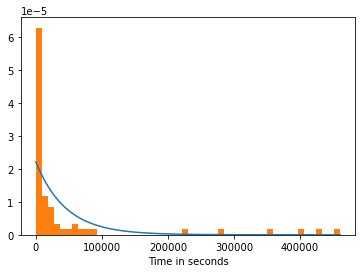

In [163]:
#x = np.linspace(0, np.log(spn_1569['difference_firstspn_5246'].max() + 1), 1000)
y = jfaults_filter.loc[(jfaults_filter.Keep==1) & (jfaults_filter['5246_within_window'] == True)]['time_delta_5246'].dt.total_seconds()
x = np.linspace(0, y.max(), 1000)
#logy = np.log(y + 1)
dist = getattr(scipy.stats, 'expon')
#param = dist.fit(np.log(y + 1))
param = dist.fit(y)
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
plt.plot(x, pdf_fitted)
plt.hist(y,
        bins = 50,
        density=True)
plt.xlabel('Time in seconds')

In [84]:
param

(0.0, 49209.57627118644)

In [173]:
#cdf 
expon.cdf(60 * 60 * 24, *param)

0.8519230848894285

In [143]:
jfaults['difference_firstspn_5246'] = jfaults['time_next_5246'] - jfaults['EventTimeStamp']
#fancy code keeps only rows without Na's. Something to remember!!!
jfaults_NoNa = jfaults[~jfaults['difference_firstspn_5246'].isnull()]
jfaults_NoNa

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,time_delta_5246,difference_firstspn_5246
1154225,1211449,108631659,2000-03-19 10:51:28,Low (Severity Medium) Engine Coolant Level,04358814*06075794*030816202706*09400153*G1*BDR*,79921284,6X1u13D1500000000,CMMNS,0,111,...,False,12,1961,105383198,36.698101,-87.453518,2000-03-19 10:51:23.000,2019-02-14 13:46:15,6906 days 02:54:47,6906 days 02:54:47
1154309,1211533,108663626,2000-03-19 18:56:09,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,False,126,1970,105438602,40.966666,-87.240601,2000-03-19 18:56:04.000,2019-04-29 05:02:21,6979 days 10:06:12,6979 days 10:06:12
1154310,1211534,108663627,2000-03-19 18:56:09,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,False,126,1970,105438602,40.966666,-87.240601,2000-03-19 18:56:04.000,2019-04-29 05:02:21,6979 days 10:06:12,6979 days 10:06:12
982227,1016466,49680016,2010-12-31 22:04:03,Incorrect Data J1939 Network #1 Primary Vehicl...,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W24155105,EC80ESP,BNDWS,11,639,...,False,4,1827,105464811,36.123240,-86.398194,2018-05-22 11:33:20.000,2019-01-21 09:01:38,2942 days 10:57:35,2942 days 10:57:35
1105904,1154407,85463073,2010-12-31 23:03:26,High Voltage (Fuel Level),NaN,NaN,CE,PACCR,49,96,...,True,83,1877,105340279,36.066388,-86.434722,2019-05-01 09:54:19.000,2018-08-20 16:11:26,2788 days 17:08:00,2788 days 17:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185192,1246316,122700678,2020-02-27 08:41:12,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,True,4,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,0 days 03:30:21,0 days 03:30:21
1185193,1246317,122700679,2020-02-27 08:41:12,Abnormal Update Rate Headway Controller Forwar...,NaN,NaN,CECU3B-NAMUX4,PACCR,49,886,...,True,3,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,0 days 03:30:21,0 days 03:30:21
1185208,1246332,122706890,2020-02-27 08:42:47,Low (Severity High) Battery Potential / Power ...,5516010*202.21.0*5516502*E003.e003*5539401*25....,Z0017655,EEO-xxF112C,EATON,3,168,...,True,1,2211,105329862,36.066342,-86.434537,2020-02-27 08:43:07.000,2020-02-27 12:11:33,0 days 03:28:46,0 days 03:28:46
1185276,1246400,122740698,2020-02-27 12:10:53,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5394,...,True,1,2211,105329862,36.066296,-86.434490,2020-02-27 12:11:29.000,2020-02-27 12:11:33,0 days 00:00:40,0 days 00:00:40


In [144]:
jfaults_NoNa['difference_firstspn_5246'] = pd.to_numeric(jfaults_NoNa['difference_firstspn_5246'])

<ipython-input-144-98b2abd9259d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfaults_NoNa['difference_firstspn_5246'] = pd.to_numeric(jfaults_NoNa['difference_firstspn_5246'])


In [145]:
# plot distribution without log transformation
# size is sample size
# y will be the values to be counted

#use spn_111 as a test
#step_1 define the dataframe by spn.

#throwing out greater than 1 year or whatever 
#spn_111 = jfaults_NoNa.loc[spn_111.difference_firstspn_5246 < 31536000]
#find sample size
spn_111 = jfaults_NoNa.loc[jfaults_NoNa.spn== 111, :]
size = spn_111.shape[0]
x = np.linspace(0, spn_111['difference_firstspn_5246'].max(), 1000)
y = spn_111['difference_firstspn_5246']

                      
plt.hist(y, 
        bins = 50)
# List the distributions to be fitted
#dist_names = ['alpha', 'beta', 'expon', 'gamma', 'norm', 'rayleigh']

# Fit the distributions to the data and plot their probability density functions
#for dist_name in dist_names:
    dist = getattr(scipy.stats, 'weibull_min')
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size
    plt.plot(pdf_fitted, label=dist_name)
    #plt.xlim(0,1000000)
plt.legend(loc='upper right')
plt.title('Time to 5246 Distribution')
plt.xlabel("Failure Time")
plt.ylabel("Frequency")
plt.show()

IndentationError: unexpected indent (<ipython-input-145-02ad4eab6f30>, line 24)

C:\Users\bng19\anaconda3_64bit\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\bng19\anaconda3_64bit\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


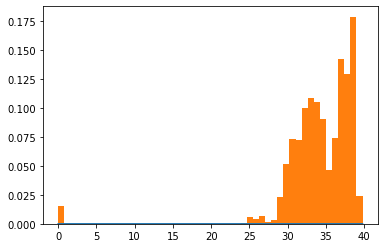

In [146]:
spn_1569 = jfaults_NoNa.loc[jfaults_NoNa.spn== 1569, :]
x = np.linspace(0, spn_1569['difference_firstspn_5246'].max(), 1000)
y = spn_1569['difference_firstspn_5246']
logy = np.log(y + 1)
dist = getattr(scipy.stats, 'beta')
param = dist.fit(np.log(y + 1))
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
plt.plot(np.log(x + 1), pdf_fitted)
plt.hist(logy,
        bins = 50,
        density=True);


In [147]:
param

(7339202.320658125,
 1.6984743080123024,
 -23616582.891802102,
 23616622.685643796)

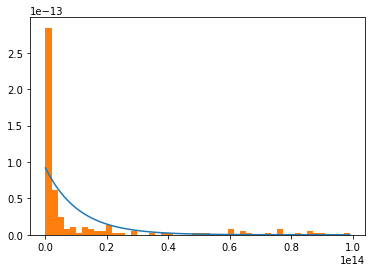

In [149]:
jfaults_NoNa_week = jfaults_NoNa.loc[jfaults_NoNa.difference_firstspn_5246 < 100000000000000]
spn_5394 = jfaults_NoNa_week.loc[jfaults_NoNa_week.spn== 4094, :]
#x = np.linspace(0, np.log(spn_1569['difference_firstspn_5246'].max() + 1), 1000)
x = np.linspace(0, spn_5394['difference_firstspn_5246'].max(), 1000)
y = spn_5394['difference_firstspn_5246']
logy = np.log(y + 1)
dist = getattr(scipy.stats, 'expon')
#param = dist.fit(np.log(y + 1))
param = dist.fit(y)
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
plt.plot(x, pdf_fitted)
plt.hist(y,
        bins = 50,
        density=True);



In [125]:
spn_5394.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 82046 to 1185276
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RecordID                  166 non-null    int64         
 1   ESS_Id                    166 non-null    int64         
 2   EventTimeStamp            166 non-null    datetime64[ns]
 3   eventDescription          0 non-null      object        
 4   ecuSoftwareVersion        130 non-null    object        
 5   ecuSerialNumber           127 non-null    object        
 6   ecuModel                  127 non-null    object        
 7   ecuMake                   127 non-null    object        
 8   ecuSource                 166 non-null    int64         
 9   spn                       166 non-null    int64         
 10  fmi                       166 non-null    int64         
 11  active                    166 non-null    bool          
 12  activeTransiti

In [107]:
param

(0.2044717400882599, -1.0156667046037815e-29, 1.1273632234689426)

In [128]:
#cdf 
expon.cdf(6*60*60*10**9, *param)

0.6291241092057249

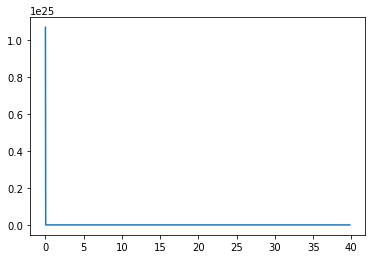

In [102]:
plt.plot(x, pdf_fitted)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

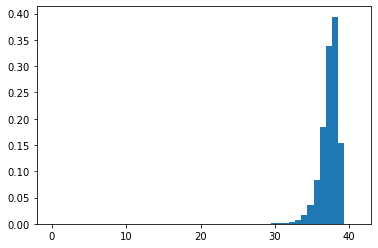

In [63]:
logy = np.log(y + 1)
plt.hist(logy,
        bins = 50,
        density=True)
plt.plot

In [111]:
jfaults.loc[:, 'time_next_5246'].notna().value_counts()

False    897999
True     289336
Name: time_next_5246, dtype: int64

In [64]:
Long = [-86.4347222, -86.4438888, -83.174722]
Lat = [36.0666667, 35.5883333, 36.1950]
dist = 0.0167

for i, j in zip(Lat, Long): 
    jfaults = jfaults[((jfaults['Latitude'] > i + dist) | (jfaults['Latitude']  < i - dist)) 
        & ((jfaults['Longitude'] < j - dist) | (jfaults['Longitude'] > j + dist))]

In [124]:
jfaults['Id'].nunique()

1059

In [124]:
-86.4347222 - 0.0167

-86.4514222

In [30]:
sfc = pd.read_excel('data/Service_Fault_Codes_1_0_0_167.xlsx')

C:\Users\bng19\anaconda3_64bit\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [31]:
sfc.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [70]:
sfc[sfc['SPN'] == 5246]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [98]:
joined_jf_vdod = jfaults.merge(vdod, on = 'Id', how='inner')

In [99]:
joined_jf_vdod

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,Name,Value,FaultId
0,2090,1011009,2015-02-23 05:05:44.000,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,LampStatus,1023,180
1,884718,28328550,2017-10-04 05:56:17.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105407611,37.839675,-80.753611,2017-10-04 05:56:52.000,LampStatus,1023,180
2,884884,28351338,2017-10-04 09:30:37.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1630,105407611,37.839444,-80.754861,2017-10-04 09:30:32.000,LampStatus,1023,180
3,2972,1026305,2015-02-23 15:54:22.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,EngineOilPressure,27.84,170
4,5714,1070646,2015-02-25 13:53:08.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,SwitchedBatteryVoltage,3276.75,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1237841,119019219,2011-01-01 00:03:23.000,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,5246,...,True,1,2175,105465629,33.259027,-84.096666,2020-01-28 05:15:35.000,EngineCoolantTemperature,176,239
913,1239555,119959276,2020-02-06 07:45:08.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1854,105385876,35.943611,-83.823009,2020-02-06 07:45:44.000,IgnStatus,True,208
914,1239564,119961467,2020-02-06 08:03:09.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,IgnStatus,True,208
915,1241841,120905759,2020-02-13 13:32:39.000,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,ParkingBrake,False,208


In [104]:
joined_jf_vdod.FaultId.value_counts()

172    152
171    105
202     50
163     45
173     44
191     40
170     37
174     36
33      29
175     25
213     24
188     22
195     20
158     20
242     20
208     19
159     17
162     16
197     16
207     15
166     14
183     14
212     14
189     12
156     12
235      9
184      8
215      8
209      8
198      8
218      6
31       6
180      6
220      4
231      4
229      4
227      4
210      3
205      2
239      2
154      2
192      2
204      2
161      2
186      2
32       2
201      2
214      1
230      1
155      1
Name: FaultId, dtype: int64